## 作業

閱讀以下兩篇文獻，了解決策樹原理，並試著回答後續的問題
- [決策樹 (Decision Tree) - 中文](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda)
  * 了解 "熵(Entroy)" 和 "Gini Impurity" 資訊量函式與計算過程
  * 以 Iris dataset 為例，看執行過程
- [how decision tree works - 英文](http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/)
  * Decision tree algorithm can be used for solving regression and classification problems
  * The general motive of using Decision Tree is to create a training model which can use to predict class or value of target  ariables by learning decision rules inferred from prior data(training data).
  * Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.
  
1. 在分類問題中，若沒有任何限制，決策樹有辦法在訓練時將 training loss 完全降成 0 嗎？
2. 決策樹只能用在分類問題嗎？還是可以用來解決回歸問題？


## 參考解答

* 若資料是符合函數的假設，亦即沒有一對多的情形，這時候如果不對決策樹進行限制，決策樹是可以為每一個訓練樣本找到其對應的規則，就能夠把訓練 loss 降為 ０
* 決策樹同樣可以用來做回歸問題，這時評量資料相似程度則會用該群的平均數為每個值計算差距，可以想像標準差要是越小，該群中的樣本越相似。更多資訊可參考

# 課後補充:



補充資料： [手刻決策樹 by Python](https://youtu.be/LDRbO9a6XPU)  (推薦有 Python 經驗的學生來練習)

## 介紹：如何使用決策樹來的分類 Iris 資料集

In [1]:
# 載入必要函式

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 載入 Iris 資料集
iris = datasets.load_iris()
# print(iris.keys())
# print(iris['DESCR'])
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("feature_names: " + str(iris['feature_names']))
print("target_names: " + str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data = iris_data[iris_data['target'].isin([0, 1])]
print(iris_data.head(3))

feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target_names: ['setosa' 'versicolor' 'virginica']
   sepal length (cm)  petal length (cm)  target
0                5.1                1.4       0
1                4.9                1.4       0
2                4.7                1.3       0


In [3]:
# 將資料的 70% 拿出來train，剩下的 30％ 用來檢測 train 的好壞
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']], 
                                                    iris_data[['target']], test_size=0.3, random_state=0)

In [4]:
# 載入決策樹函式，criterion 使用我們前面介紹的 entropy
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [5]:
# 看結果，發現也全部預測正確了

print(tree.predict(X_test))
print(y_test['target'].values)
tree.score(X_test, y_test['target'])

[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]
[0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1]


1.0

## 使用export_graphviz函式來將樹的實際長相視覺化
* 發現決策樹找到的規則是只要花瓣長度≤2.45，就能夠正確分類

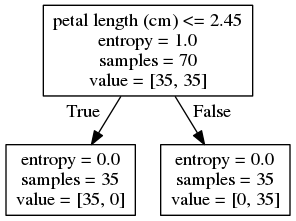

In [6]:
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus

dot_data = export_graphviz(tree, out_file=None, feature_names=['sepal length (cm)','petal length (cm)'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())